In [1]:
import os
import pandas
import numpy as np
import nibabel as ni
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from glob import glob



In [2]:
# matfile
matfile = '/Users/jakevogel/Science/tau/ESM_tau/results/prelim/ESM_tau_propagation_28-Jan-2018.mat'
mat = loadmat(matfile)

In [3]:
# reference dataframe
refsht = '/Users/jakevogel/Science/tau/ADNI_MASTER.csv'
refdf = pandas.read_csv(refsht)


In [4]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*'))
sids = [x.split('/')[-1].split('_')[2] for x in scans]
sids[0]

'002-S-4229'

In [255]:
! ls -lrth /Users/jakevogel/Science/tau/

total 5013120
-rw-rw-r--@  1 jakevogel  staff    14M Aug 20  2016 MNI152_T1_1mm_brain.nii
-rw-rw-r--@  1 jakevogel  staff   2.1M Sep 23  2016 test_4815.nii.gz
-rw-r--r--@  1 jakevogel  staff   120K Dec 14  2016 nii_dkt_atlas_1p5mm.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4262_18F-AV1451_2016-02-25_P4_I651320.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4521_18F-AV1451_2016-04-05_P4_I730844.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4654_18F-AV1451_2016-04-21_P4_I699996.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4799_18F-AV1451_2016-07-27_P4_I767572.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-2394_18F-AV1451_2016-07-19_P4_I762869.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-4620_18F-AV1451_2016-07-15_P4_I761155.nii.gz

-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_012-S-4643_18F-AV1451

In [5]:
# reference dataframe
sht = '/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv'
df = pandas.read_csv(sht)
df.head()

,Unnamed: 0,subs,subs.1,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.2,RID,SITE,COLPROT,ORIGPROT,...,brain_partition_consensus_ind_lund_sci5_scf5_5,lund_ET_3_1,lund_ET_3_2,lund_ET_3_3,lund_ET_6_1,lund_ET_6_2,lund_ET_6_3,lund_ET_6_4,lund_ET_6_5,lund_ET_6_6
0,0,002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,...,1.001502,1.348725,1.067139,1.103361,1.348725,1.115261,1.081559,1.238158,1.103050,1.051729
1,1,002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,...,1.145301,1.507033,1.165363,1.106672,1.507033,1.120392,1.141073,1.190362,1.182348,1.090506
2,2,002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,...,1.250661,1.542644,1.144523,1.285093,1.542644,1.314419,1.292172,1.414967,1.184433,1.141633
3,3,002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,...,1.186976,1.198241,1.018570,0.983168,1.198241,0.974095,1.043101,1.081553,1.044473,0.990339
4,4,002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,...,1.095576,1.542920,1.317958,1.241442,1.542920,1.250776,1.319128,1.337707,1.332920,1.262309


In [6]:
all([x in df.subs.tolist() for x in sids])

True

In [7]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

In [8]:
mat['models'][0,0][0][0]

array([19, 58,  1], dtype=uint8)

In [9]:
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv', header=None)
labs.columns = ['integer_label', 'label']
labs.head()

,integer_label,label
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [10]:
def get_results(mat, sids, save=True, labels = None):

    res = pandas.DataFrame(index = sids)
    for i in range(len(mat['ref_pattern'][0])):
        # Model fits
        sid = sids[i]
        r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['Final_solutions'][:,i])
        res.loc[sid,'model_r'] = r
        res.loc[sid,'model_r2'] = r**2
    res.loc[:, 'model_RMSE'] = mat['Final_RMSEs'].flatten()
    res.loc[:, 'model_eval'] = mat['Final_CORRs'].flatten()

    if save:
        # params
        res.loc[:, 'beta'] = mat['Final_parameters'][0,:].flatten()
        res.loc[:, 'delta'] = mat['Final_parameters'][1,:].flatten()
        res.loc[:, 'sigma'] = mat['Final_parameters'][2,:].flatten()

        # other
        res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
        res.loc[:, 'times'] = mat['Final_times'].flatten()
        res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()
    
    print('average r2 = ', res.model_r2.mean())
    print('average RMSE =', res.model_RMSE.mean())
    print('average eval =', res.model_eval.mean())
    
    if type(labels) != type(None):
        print('model identfied the following epicenters')
        for l in mat['models'][0,0][0][0]:
            print(labels.iloc[l-1]['label'])
    
    if save:
        return res

In [11]:
res = get_results(mat, sids, labels=labs)

average r2 =  0.06994033033521488
average RMSE = 0.1506926715373993
average eval = 0.8042727112770081
model identfied the following epicenters
 Pericalcarine
 Pericalcarine
 Caudal anterior cingulate


In [12]:
df.columns[18:30]

Index(['APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting'],
      dtype='object')

In [13]:
# add demos
res.loc[:,'amyloid'] = df.av45_status_wcb.values
res.loc[:,'DX'] = df.DX_final.values
res.loc[:,'Age'] = df.AGE.values
res.loc[:,'Gender'] = df.PTGENDER.values
res.loc[:,'Education'] = df.PTEDUCAT.values
res.loc[:,'ApoE4'] = df.APOE4.values

In [14]:
res.Age.mean()

71.34444444444445

In [15]:
res.ref_age.mean()

76.11271611111111

In [16]:
refdf.index = [x.replace('_','-') for x in refdf.PTID]

AttributeError: 'float' object has no attribute 'replace'

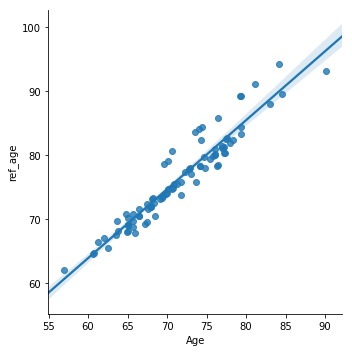

In [17]:
plt.close()
sns.lmplot('Age','ref_age',data=res)
plt.show()

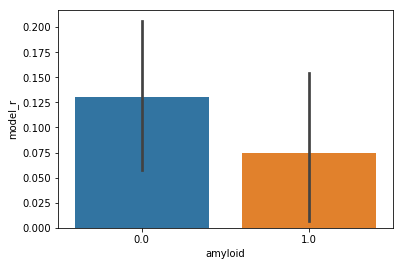

In [18]:
plt.close()
sns.barplot('amyloid','model_r',data=res)
plt.show()

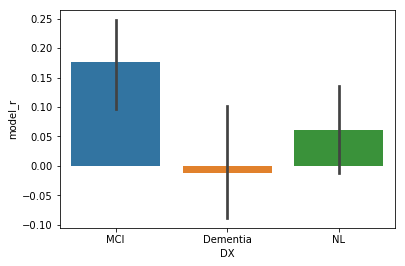

In [19]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

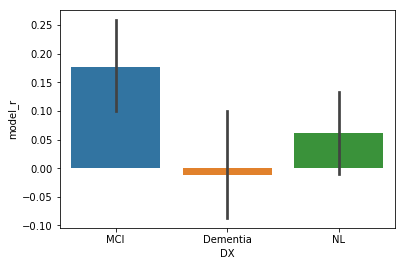

In [20]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

In [21]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.amyloid==0][col],
                         res[res.amyloid==1][col])
    if p<0.05:
        print(col,t,p)

model_RMSE -2.75004281345 0.00727891817615
delta 2.29735684584 0.0240559609117
ref_age -4.13858031733 8.1909768325e-05
times -3.80537027699 0.000266216691066
Onset_age 2.11950013743 0.0369648363764


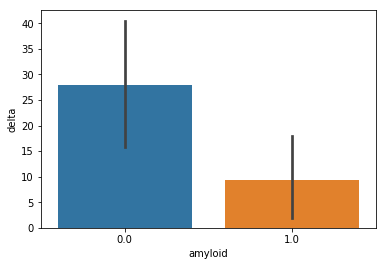

In [22]:
plt.close()
sns.barplot('amyloid','delta',data=res)
plt.show()

In [23]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(res[res.DX=='NL'][col],
                         res[res.DX=='MCI'][col],
                        res[res.DX=='Dementia'][col])
    if p<0.05:
        print(col,f,p)

model_r 3.57375856754 0.0322404866906
model_r2 3.24775835305 0.0436202643995
model_RMSE 6.20207622351 0.00303382535405
model_eval 3.51140127014 0.0341541619769
ref_age 3.79984905001 0.0261747984098


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


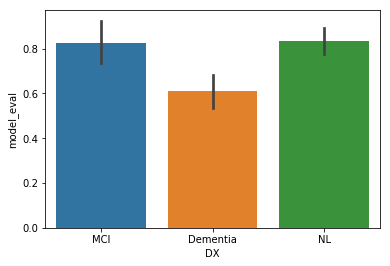

In [24]:
plt.close()
sns.barplot('DX','model_eval',data=res)
plt.show()

In [25]:
res.loc[:,'DX_AB'] = [res.loc[x,'DX']+'+' if res.loc[x,'amyloid']==1 else res.loc[x,'DX']+'-' for x in res.index]

In [26]:
nres = pandas.DataFrame(res,copy=True)

In [27]:
nres.loc[:,'DX_AB'] = [nres.loc[x,'DX']+'+' if nres.loc[x,'amyloid']==1 else nres.loc[x,'DX']+'-' for x in nres.index]

In [28]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(nres[nres.DX_AB=='NL-'][col],
                         nres[nres.DX_AB=='NL+'][col],
                         nres[nres.DX_AB=='MCI-'][col],
                         nres[nres.DX_AB=='MCI+'][col],
                        nres[nres.DX_AB=='Dementia+'][col])
    if p<0.1:
        print(col,f,p)

model_r2 3.23336319096 0.0161300454602
model_RMSE 4.05865232102 0.00466900747119
model_eval 2.17361372766 0.0789137601679
delta 3.6067567472 0.00919619636183
ref_age 3.5406924009 0.0101566419126
times 4.0683318673 0.00460188671269


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


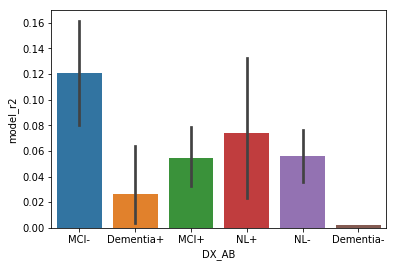

In [29]:
plt.close()
sns.barplot('DX_AB','model_r2',data=res)
plt.show()

In [30]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.ApoE4==0][col],
                         res[res.ApoE4==1][col])
    if p<0.05:
        print(col,t,p)

In [31]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.Gender==0][col],
                         res[res.Gender==1][col])
    if p<0.05:
        print(col,t,p)

In [32]:
for col in res.columns[:10]:
    r,p = stats.pearsonr(res[col], res['Education'])
    if p<0.05:
        print(col,r,p)

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [33]:
# look at regional accuracy across subjects
# look at subject accuracy across regions
# look at relationship between total tau(P) and model fit params
# make average images for disease-ab groups for true and predicted probabilities
# examine probability metrics



In [34]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

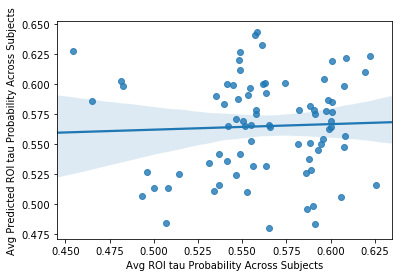

In [35]:
# look at regional accuracy across subjects
plt.close()
sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()

In [36]:
jnk = mat['ref_pattern'].mean(1)
[i for i in range(len(jnk)) if jnk[i] <0.49]

[34, 38, 73, 77]

In [60]:
labs.loc[77]

integer_label           78
label             Thalamus
Name: 77, dtype: object

In [49]:
lablist = list(range(len(mat['ref_pattern'].mean(1))))
todel = [i for i in range(len(jnk)) if jnk[i] <0.49]
for i,lab in enumerate(todel):
    lablist.remove(lab)
jref = mat['ref_pattern'].mean(1)[lablist]
jpred = mat['Final_solutions'].mean(1)[lablist]

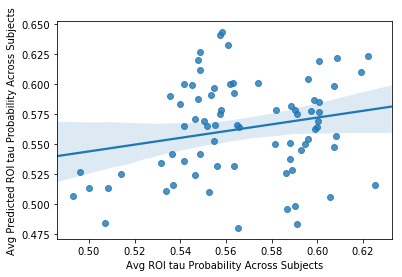

In [52]:
# look at regional accuracy across subjects
plt.close()
sns.regplot(jref, jpred)
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()

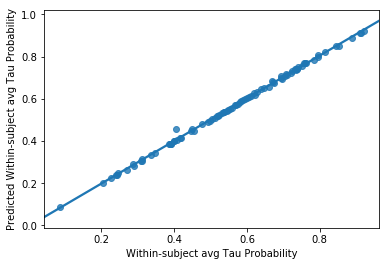

In [37]:
# look at subject accuracy across regions
plt.close()
sns.regplot(mat['ref_pattern'].mean(0), mat['Final_solutions'].mean(0))
plt.xlabel('Within-subject avg Tau Probability')
plt.ylabel('Predicted Within-subject avg Tau Probability')
plt.show()

In [46]:
res.loc[:,'pred_avg_tau_prob'] = mat['Final_solutions'].mean(0)
res.loc[:,'avg_tau_prob'] = mat['ref_pattern'].mean(0)

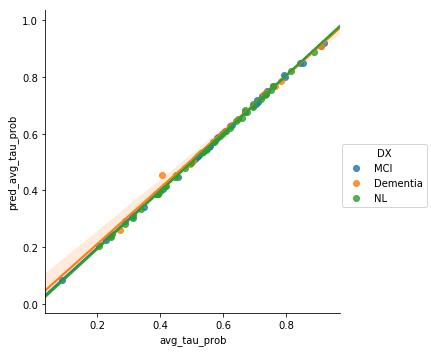

In [47]:
# look at subject accuracy across regions
plt.close()
sns.lmplot('avg_tau_prob', 'pred_avg_tau_prob',data=res,hue='DX')
plt.show()

In [245]:
plt.subplots?

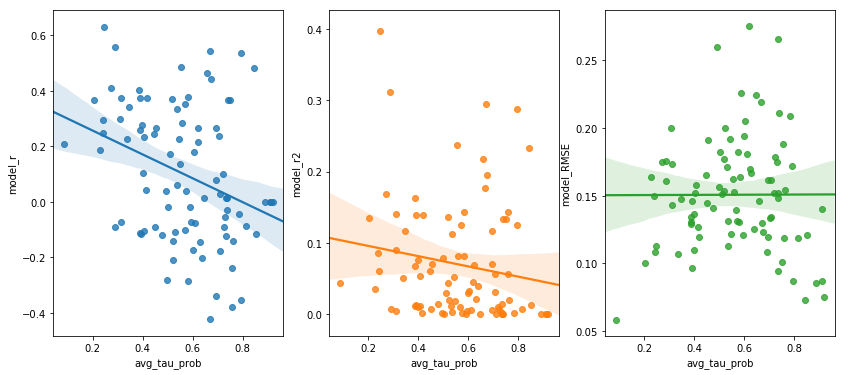

model_r -0.326100858882 0.00170899044778
model_r2 -0.1617996434 0.127616754281
model_RMSE 0.0028224852507 0.978936539328


In [48]:
# look at relationship between total tau(P) and model fit params
plt.close()
fig, axes = plt.subplots(ncols=3,sharex=True,figsize = (14,6))
for i,col in enumerate(res.columns[:3]):
    sns.regplot('avg_tau_prob', col, data=res, ax = axes[i])

plt.show()
for col in res.columns[:3]:
    r,p = stats.pearsonr(res[col], res['avg_tau_prob'])
    print(col,r,p)

In [316]:
# make average images for disease-ab groups for true and predicted probabilities
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv',header=None)
labs.columns = ['int_lab','str_lab']
labs.str_lab = [x.lstrip() for x in labs.str_lab]
njnk = ni.load('/Users/jakevogel/git/pycourse_vuMC/stuff/dkt_atlas_1mm.nii.gz')
atl = njnk.get_data()

In [321]:
refT = pandas.DataFrame(mat['ref_pattern']).transpose()
refT.index = res.index
refT.columns = labs['int_lab']
predT = pandas.DataFrame(mat['Final_solutions']).transpose()
predT.index = res.index
predT.columns = labs['int_lab']

In [325]:
dfs = {'reference': refT, 'predicted': predT}
for dx in res.DX_AB.unique():
    for nm,d in dfs.items():
        imap = np.zeros_like(atl)
        sdf = d.loc[res[res.DX_AB==dx].index].mean(axis=0) 
        for roi in np.unique(atl)[1:]:
            if roi in labs.int_lab:
                imap[atl==roi] = sdf[roi]
            else:
                imap[atl==roi] = 0
        nimg = ni.Nifti1Image(imap, njnk.affine)
        inm = 'ESM_%s_values_%s'%(nm,dx)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/prelim/%s'%inm)
        print('created',inm)

created ESM_reference_values_MCI-
created ESM_predicted_values_MCI-
created ESM_reference_values_Dementia+
created ESM_predicted_values_Dementia+
created ESM_reference_values_MCI+
created ESM_predicted_values_MCI+
created ESM_reference_values_NL+
created ESM_predicted_values_NL+
created ESM_reference_values_NL-
created ESM_predicted_values_NL-
created ESM_reference_values_Dementia-
created ESM_predicted_values_Dementia-


In [324]:
sdf[1]

0.99828769746338442